
#**Text Classification and Sentiment Analysis using Natural Language Processing (NLP)**


# Installing libraries

In [ ]:
!pip install nltk
!pip install textblob
!pip install wordcloud
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

In [ ]:
# ===============================
# Visualization & Data Handling
# ===============================
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ===============================
# NLP Libraries
# ===============================
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud

# ===============================
# Machine Learning Models
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier

# ===============================
# Preprocessing & Feature Extraction
# ===============================
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# ===============================
# Model Selection & Evaluation
# ===============================
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    GridSearchCV
)

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

# ===============================
# Pandas Display Settings
# ===============================
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: f"{x:.3f}")




### Dataset :

I used the **Amazon Review Rating & Product Sorting Review** dataset from Kaggle. It contains:

- **reviewText:** Customer review  
- **overall:** Star rating (1–5)  
- **helpful:** Helpful votes  
- **reviewerID / asin:** Reviewer and product IDs  

It provides both textual feedback from users and numerical ratings, which makes it ideal for performing **sentiment analysis**, **review ranking and sorting**, and **exploratory data analysis**. By analyzing this dataset, we can understand customer opinions, identify positive and negative feedback, and explore patterns in product ratings and review helpfulness. This dataset serves as a strong foundation for building machine learning models to predict sentiment or highlight the most informative reviews.


# Importing dataset

In [ ]:

def load_dataframe(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    return df


csv_path = "/content/drive/MyDrive/nlp-project/amazon_review.csv"

df = load_dataframe(csv_path)
df.head()


,reviewerid,asin,reviewername,helpful,reviewtext,overall,summary,unixreviewtime,reviewtime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.000,best deal around,1373673600,2013-07-13,513,0,0


# **Text preprocessing**

## normalize the case folding

In [ ]:
df['reviewtext'] = df['reviewtext'].str.lower()
df['reviewtext']

,reviewtext
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


## remove the punctuation signs

In [ ]:
df['reviewtext'] = df['reviewtext'].str.replace('[^\w\s]','')
df['reviewtext']

,reviewtext
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


## remove numbers from the variable

In [ ]:
df['reviewtext'] = df['reviewtext'].str.replace('\d', '')
df['reviewtext']

,reviewtext
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


## remove the commonly used words from the variable

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw = stopwords.words('english')
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewtext']

,reviewtext
0,issues.
1,"purchased device, worked advertised. never muc..."
2,works expected. sprung higher capacity. think ...
3,think worked great.had diff. bran 64gb card we...
4,"bought retail packaging, arrived legit, orange..."
...,...
4910,"bought sandisk 16gb class 10 use htc inspire, ..."
4911,used extending capabilities samsung galaxy not...
4912,great card fast reliable. comes optional adapt...
4913,"good amount space stuff want do, fits gopro. say?"


##  remove rare words from the variable

#### create a temporary dataframe to determine the frequency of each word

In [ ]:
temp_df = pd.Series(' '.join(df['reviewtext']).split()).value_counts()
temp_df

,count
card,3475
works,1468
memory,1182
sd,1131
phone,1113
...,...
temperature/vibrations.,1
this.the,1
months:,1
-5f,1


### get and remove the rare words being the frequency is 1

In [ ]:
rares = temp_df[temp_df <= 1]
rares
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in rares))
df['reviewtext']

,count
areas,1
coast,1
remember.,1
fari,1
cards..i,1
...,...
temperature/vibrations.,1
this.the,1
months:,1
-5f,1


,reviewtext
0,issues.
1,"purchased device, worked advertised. never muc..."
2,works expected. higher capacity. think made bi...
3,think worked 64gb card went south 3 one held p...
4,"bought retail packaging, arrived legit, versio..."
...,...
4910,"bought sandisk 16gb class 10 use htc 3 months,..."
4911,used capabilities samsung galaxy note 10. grea...
4912,great card fast reliable. comes optional adapt...
4913,"good amount space stuff want do, fits gopro. say?"


## **Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import textblob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
df['reviewtext'].apply(lambda x: TextBlob(x).words).head()


,reviewtext
0,[issues]
1,"[purchased, device, worked, advertised, never,..."
2,"[works, expected, higher, capacity, think, mad..."
3,"[think, worked, 64gb, card, went, south, 3, on..."
4,"[bought, retail, packaging, arrived, legit, ve..."


## **Lemmatization**

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewtext']

,reviewtext
0,issues.
1,"purchased device, worked advertised. never muc..."
2,work expected. higher capacity. think made bit...
3,think worked 64gb card went south 3 one held p...
4,"bought retail packaging, arrived legit, versio..."
...,...
4910,"bought sandisk 16gb class 10 use htc 3 months,..."
4911,used capability samsung galaxy note 10. greatl...
4912,great card fast reliable. come optional adapte...
4913,"good amount space stuff want do, fit gopro. say?"


# Text visualization

## I turn the text to numerical format to make the visualization

In [ ]:
tf = df['reviewtext'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ['words', 'tf']
tf.sort_values('tf', ascending=False)

,words,tf
26,card,4130.000
15,work,1879.000
7,phone,1220.000
96,memory,1192.000
65,sd,1133.000
...,...,...
5813,"""exfat32""",2.000
5814,more....,2.000
5815,electric,2.000
5816,specified.,2.000


## Line and bar plots

In [ ]:
# Since getting all the words is the problem, let's show that the frequency of the words is greater than 500
px.line(tf[tf['tf'] > 500], x='words', y='tf').show()
px.bar(tf[tf['tf'] > 500], x='words', y='tf').show()

## **Word cloud**

<Figure size 1500x1500 with 0 Axes>

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

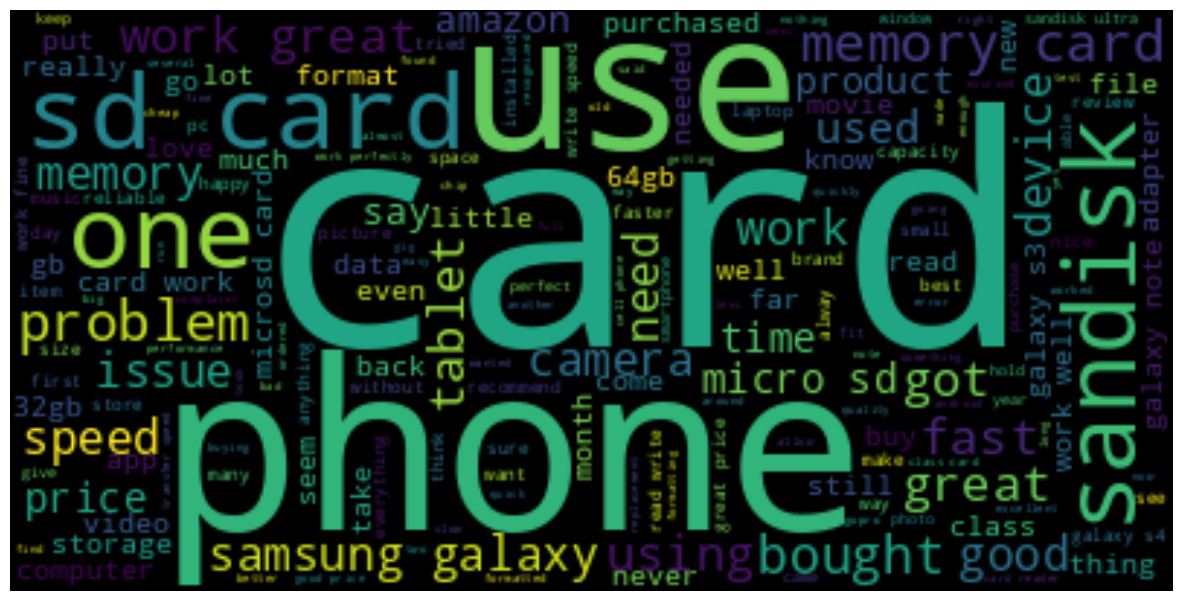

In [ ]:
text = " ".join(i for i in df.reviewtext)
word_cloud = WordCloud().generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1500x1500 with 0 Axes>

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

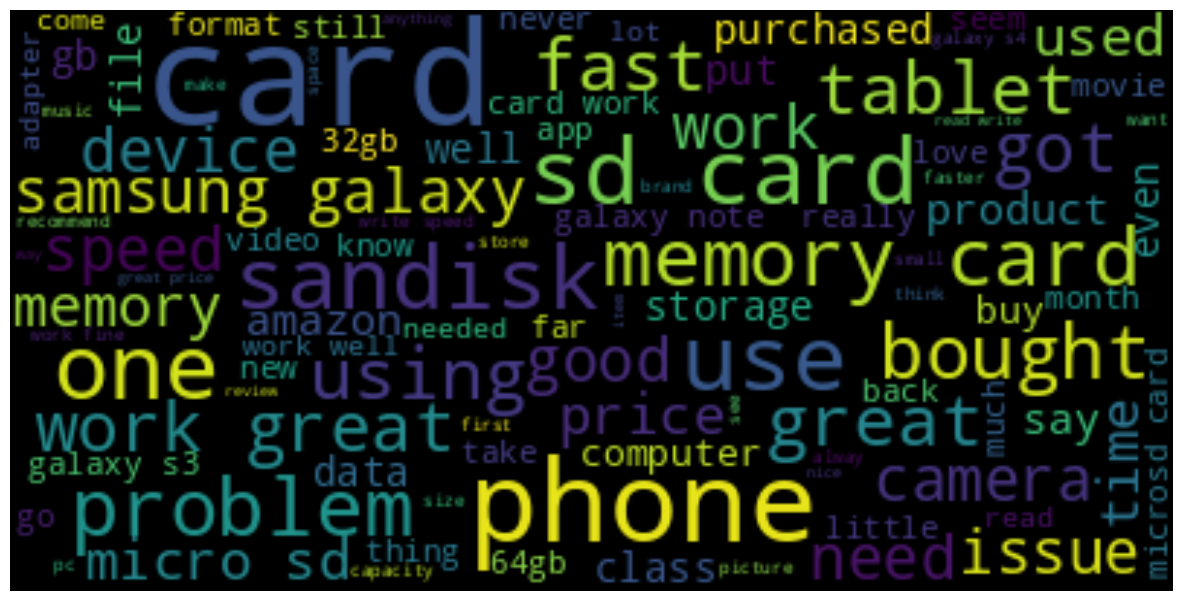

In [ ]:
word_cloud = WordCloud(max_font_size=50, max_words=100).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Sentiment Modeling**

## Sentiment analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
model = SentimentIntensityAnalyzer()
df['reviewtext'].apply(lambda x:model.polarity_scores(x))

,reviewtext
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
3,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
4,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp..."
...,...
4910,"{'neg': 0.08, 'neu': 0.863, 'pos': 0.057, 'com..."
4911,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp..."
4912,"{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp..."
4913,"{'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'comp..."


In [ ]:
df['reviewtext'].apply(lambda x:model.polarity_scores(x)['compound']).sort_values(ascending=False)

,reviewtext
4212,0.999
2031,0.997
4634,0.992
2881,0.991
2802,0.991
...,...
821,-0.929
3589,-0.957
1904,-0.967
4368,-0.971


In [ ]:
df['polarity_score'] = df['reviewtext'].apply(lambda x:model.polarity_scores(x)['compound'])
df.head()

,reviewerid,asin,reviewername,helpful,reviewtext,overall,summary,unixreviewtime,reviewtime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues.,4.000,Four Stars,1406073600,2014-07-23,138,0,0,0.000
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased device, worked advertised. never muc...",5.000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.000
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected. higher capacity. think made bit...,4.000,nothing to really say....,1356220800,2012-12-23,715,0,0,0.402
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked 64gb card went south 3 one held p...,5.000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.649
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought retail packaging, arrived legit, versio...",5.000,best deal around,1373673600,2013-07-13,513,0,0,0.859


## **Sentiment modeling**

### I created a new variable'sentiment_label' to use as a respons in modeling

In [ ]:
df['sentiment_label'] = df['reviewtext'].apply(lambda x: 'pos' if model.polarity_scores(x)['compound'] > 0 else 'neg')
df.head()

,reviewerid,asin,reviewername,helpful,reviewtext,overall,summary,unixreviewtime,reviewtime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues.,4.000,Four Stars,1406073600,2014-07-23,138,0,0,0.000,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased device, worked advertised. never muc...",5.000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.000,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected. higher capacity. think made bit...,4.000,nothing to really say....,1356220800,2012-12-23,715,0,0,0.402,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked 64gb card went south 3 one held p...,5.000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.649,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought retail packaging, arrived legit, versio...",5.000,best deal around,1373673600,2013-07-13,513,0,0,0.859,pos


### the distribution of the new variable

In [ ]:
df['sentiment_label'].value_counts()
px.histogram(df, x='sentiment_label').show()

,count
sentiment_label,
pos,3933
neg,982


### I encode the dependent variable 'sentiment_label'

In [ ]:
df['sentiment_label'] = LabelEncoder().fit_transform(df['sentiment_label'])
df.head()

,reviewerid,asin,reviewername,helpful,reviewtext,overall,summary,unixreviewtime,reviewtime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues.,4.000,Four Stars,1406073600,2014-07-23,138,0,0,0.000,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased device, worked advertised. never muc...",5.000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.000,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected. higher capacity. think made bit...,4.000,nothing to really say....,1356220800,2012-12-23,715,0,0,0.402,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked 64gb card went south 3 one held p...,5.000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.649,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought retail packaging, arrived legit, versio...",5.000,best deal around,1373673600,2013-07-13,513,0,0,0.859,1


### I used the review text as input features (X)  and the sentiment labels as the target (y)

In [ ]:
X = df['reviewtext']
y = df['sentiment_label']

# **COUNT-VECTORS  method**

# split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['reviewtext'],
    df['sentiment_label'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_label']
)


In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count  = vectorizer.transform(X_test)


In [ ]:
log_model_count = LogisticRegression(max_iter=1000)
log_model_count.fit(X_train_count, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_test = log_model_count.predict(X_test_count)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.73      0.59      0.65       196
           1       0.90      0.95      0.92       787

    accuracy                           0.87       983
   macro avg       0.82      0.77      0.79       983
weighted avg       0.87      0.87      0.87       983



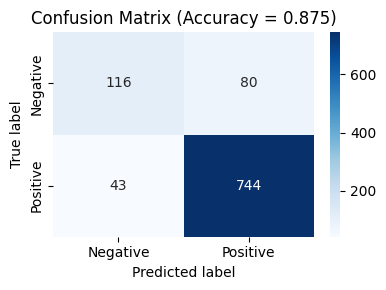

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix function
def plot_confusion_matrix(y_true, y_pred):
    acc = round(accuracy_score(y_true, y_pred), 3)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"]
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix (Accuracy = {acc})")
    plt.tight_layout()
    plt.show()

# Plot confusion matrix on TEST data
plot_confusion_matrix(y_test, y_pred_test)


In [ ]:
y_prob_test = log_model_count.predict_proba(X_test_count)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_test)

print("ROC-AUC on test data:", round(roc_auc, 3))


ROC-AUC on test data: 0.928


In [ ]:


pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("model", LogisticRegression(max_iter=1000))
])

print("Accuracy:", round(cross_val_score(pipeline, X, y, cv=10, scoring="accuracy").mean(), 3))
print("Recall:", round(cross_val_score(pipeline, X, y, cv=10, scoring="recall").mean(), 3))
print("Precision:", round(cross_val_score(pipeline, X, y, cv=10, scoring="precision").mean(), 3))
print("F1:", round(cross_val_score(pipeline, X, y, cv=10, scoring="f1").mean(), 3))
print("ROC-AUC:", round(cross_val_score(pipeline, X, y, cv=10, scoring="roc_auc").mean(), 3))


Accuracy: 0.882
Recall: 0.945
Precision: 0.912
F1: 0.928
ROC-AUC: 0.919


# **TF-IDF method for word level**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_word = TfidfVectorizer()

X_train_tfidf_word = tfidf_vectorizer_word.fit_transform(X_train)
X_test_tfidf_word  = tfidf_vectorizer_word.transform(X_test)


In [ ]:
logistic_model_word = LogisticRegression(max_iter=1000)
logistic_model_word.fit(X_train_tfidf_word, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_word = logistic_model_word.predict(X_test_tfidf_word)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_word))


              precision    recall  f1-score   support

           0       0.84      0.16      0.27       196
           1       0.83      0.99      0.90       787

    accuracy                           0.83       983
   macro avg       0.83      0.58      0.59       983
weighted avg       0.83      0.83      0.78       983



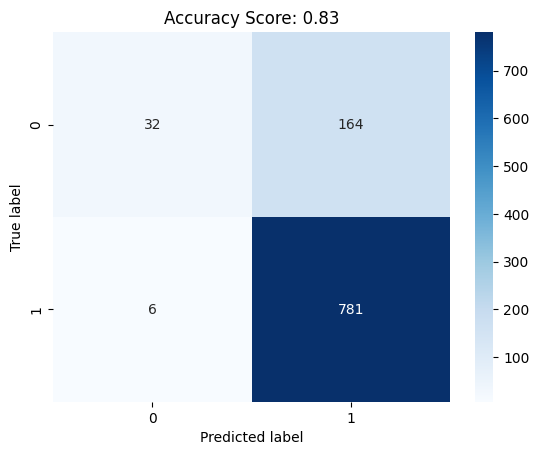

In [ ]:

def plot_confusion_matrix(y_true, y_pred):
    acc = round(accuracy_score(y_true, y_pred), 2)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Accuracy Score: {acc}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_word)


In [ ]:
y_prob_word = logistic_model_word.predict_proba(X_test_tfidf_word)[:, 1]
print('The roc_auc_score is', round(roc_auc_score(y_test, y_prob_word), 3))


The roc_auc_score is 0.914


# Cross validation for word level

In [ ]:

print('The accuracy score is', round(
    cross_val_score(logistic_model_word, X_train_tfidf_word, y_train, cv=10, scoring='accuracy').mean(), 3))

print('The recall score is', round(
    cross_val_score(logistic_model_word, X_train_tfidf_word, y_train, cv=10, scoring='recall').mean(), 3))

print('The precision score is', round(
    cross_val_score(logistic_model_word, X_train_tfidf_word, y_train, cv=10, scoring='precision').mean(), 3))

print('The f1 score is', round(
    cross_val_score(logistic_model_word, X_train_tfidf_word, y_train, cv=10, scoring='f1').mean(), 3))

print('The roc auc score is', round(
    cross_val_score(logistic_model_word, X_train_tfidf_word, y_train, cv=10, scoring='roc_auc').mean(), 3))


The accuracy score is 0.827
The recall score is 0.993
The precision score is 0.826
The f1 score is 0.902
The roc auc score is 0.9


## **TF-IDF method for ngram level**

In [ ]:
tfidf_vectorizer_ngram = TfidfVectorizer(ngram_range=(2, 3))

X_train_tfidf_ngram = tfidf_vectorizer_ngram.fit_transform(X_train)
X_test_tfidf_ngram  = tfidf_vectorizer_ngram.transform(X_test)


In [ ]:
logistic_model_ngram = LogisticRegression(max_iter=1000)
logistic_model_ngram.fit(X_train_tfidf_ngram, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_ngram = logistic_model_ngram.predict(X_test_tfidf_ngram)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ngram))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.80      1.00      0.89       787

    accuracy                           0.80       983
   macro avg       0.40      0.50      0.44       983
weighted avg       0.64      0.80      0.71       983



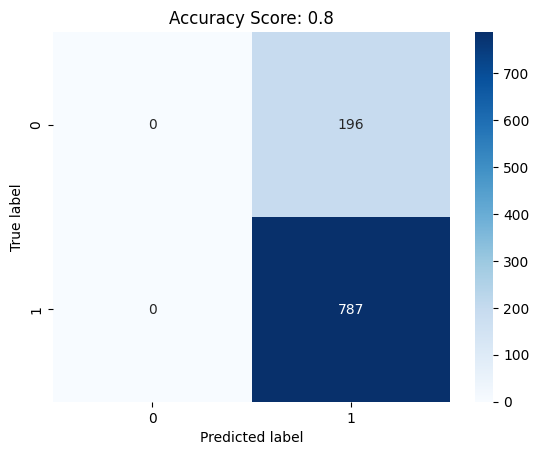

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    acc = round(accuracy_score(y_true, y_pred), 2)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Accuracy Score: {acc}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_ngram)


In [ ]:
y_prob_ngram = logistic_model_ngram.predict_proba(X_test_tfidf_ngram)[:, 1]
print('The roc_auc_score is', round(roc_auc_score(y_test, y_prob_ngram), 3))


The roc_auc_score is 0.773


In [ ]:
print('The accuracy score is', round(
    cross_val_score(logistic_model_ngram, X_train_tfidf_ngram, y_train, cv=10, scoring='accuracy').mean(), 3))

print('The recall score is', round(
    cross_val_score(logistic_model_ngram, X_train_tfidf_ngram, y_train, cv=10, scoring='recall').mean(), 3))

print('The precision score is', round(
    cross_val_score(logistic_model_ngram, X_train_tfidf_ngram, y_train, cv=10, scoring='precision').mean(), 3))

print('The f1 score is', round(
    cross_val_score(logistic_model_ngram, X_train_tfidf_ngram, y_train, cv=10, scoring='f1').mean(), 3))

print('The roc auc score is', round(
    cross_val_score(logistic_model_ngram, X_train_tfidf_ngram, y_train, cv=10, scoring='roc_auc').mean(), 3))


The accuracy score is 0.8
The recall score is 1.0
The precision score is 0.8
The f1 score is 0.889
The roc auc score is 0.755


# **Count Vectorizer example**

In [ ]:
new_review = pd.Series(['this is a great product'])

new_review_count = count_vectorizer.transform(new_review)

pred = log_model_count.predict(new_review_count)[0]

if pred == 1:
    print("Positive review 🙂")
else:
    print("Negative review 🙁")



Positive review 🙂


In [ ]:
new_review = pd.Series(['this is a great product'])

new_review_tfidf = tfidf_vectorizer_word.transform(new_review)
logistic_model_word.predict(new_review_tfidf)


array([1])

In [ ]:
random_review = pd.Series(df['reviewtext'].sample(1).values)

random_review_tfidf = tfidf_vectorizer_word.transform(random_review)
logistic_model_word.predict(random_review_tfidf)

random_review.values[0]  # to see the text


array([1])

"best class 10 microsd card own. compared card performs card have. came sd microsd card converter nice plus. card come pre-formatted work android device window devices. can't get much easier card + fast shipping = complaint"

In [ ]:
MODEL_DIR = '/content/drive/MyDrive/nlp-project'


## saving the models

In [ ]:
import joblib

joblib.dump(vectorizer, f'{MODEL_DIR}/count_vectorizer.pkl')
joblib.dump(log_model_count, f'{MODEL_DIR}/log_model_count.pkl')


['/content/drive/MyDrive/nlp-project/count_vectorizer.pkl']

['/content/drive/MyDrive/nlp-project/log_model_count.pkl']

# **BERT**

In [ ]:
!pip install -q transformers datasets torch accelerate


In [ ]:
import pandas as pd
import torch
from datasets import Dataset
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [ ]:
# df must contain: reviewtext, sentiment_label (0/1)
df = df[['reviewtext', 'sentiment_label']]
df = df.rename(columns={'reviewtext': 'text', 'sentiment_label': 'label'})


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)


In [ ]:
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))


# **Tokenization**

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(
        batch["text"],
        padding=True,
        truncation=True,
        max_length=128
    )

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/3932 [00:00<?, ? examples/s]

Map:   0%|          | 0/983 [00:00<?, ? examples/s]

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average="binary"
    )
    acc = accuracy_score(labels, preds)

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


In [ ]:
!pip install -U transformers datasets accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.3/512.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
training_args = TrainingArguments(
    output_dir="./bert_results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    report_to="none"
)


## **Training the model**

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

trainer.train()


Step,Training Loss
500,0.255500


TrainOutput(global_step=738, training_loss=0.2025791002805963, metrics={'train_runtime': 252.0758, 'train_samples_per_second': 46.795, 'train_steps_per_second': 2.928, 'total_flos': 775914502256640.0, 'train_loss': 0.2025791002805963, 'epoch': 3.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 0.3050983250141144,
 'eval_accuracy': 0.9206510681586979,
 'eval_precision': 0.93711467324291,
 'eval_recall': 0.96569250317662,
 'eval_f1': 0.951188986232791,
 'eval_runtime': 6.6231,
 'eval_samples_per_second': 148.42,
 'eval_steps_per_second': 9.361,
 'epoch': 3.0}

In [ ]:
trainer.save_model("./bert_sentiment_model")
tokenizer.save_pretrained("./bert_sentiment_model")


('./bert_sentiment_model/tokenizer_config.json',
 './bert_sentiment_model/special_tokens_map.json',
 './bert_sentiment_model/vocab.txt',
 './bert_sentiment_model/added_tokens.json',
 './bert_sentiment_model/tokenizer.json')

In [ ]:
import torch

def predict_sentiment_bert(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    )

    # 🔑 move inputs to same device as model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    prediction = torch.argmax(outputs.logits, dim=1).item()
    return "Positive" if prediction == 1 else "Negative"


In [ ]:
predict_sentiment_bert("After using this product for several weeks, I can say that the quality is excellent and the performance is amazing, I am very satisfied with my purchase.")


'Positive'

In [ ]:
save_path = "/content/drive/MyDrive/nlp-project/"


trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)


('/content/drive/MyDrive/nlp-project/tokenizer_config.json',
 '/content/drive/MyDrive/nlp-project/special_tokens_map.json',
 '/content/drive/MyDrive/nlp-project/vocab.txt',
 '/content/drive/MyDrive/nlp-project/added_tokens.json',
 '/content/drive/MyDrive/nlp-project/tokenizer.json')




--------------------------------------------------------------------------------------------------------